# NOTICE
--------------- 
* You are __NOT required__ to complete this exercise. However, you are highly recommended to complete this exercise as it is very helpful. Additionally, *some bonus points will be given.*
* If you do not have enough time to complete this exercise. Don't worry. You will have chance to understand the update rules later with built-in **Tensorflow** batch normalization function.

--------------------------

# Update rules


So far we have used vanilla stochastic gradient descent (SGD) as our update rule. More sophisticated update rules can make it easier to train deep networks. We will implement a few of the most commonly used update rules and compare them to vanilla SGD.

**Acknowledgement: This exercise is adapted from [Stanford CS231n](http://cs231n.stanford.edu/index.html).**

In [1]:
# As usual, a bit of setup

import time
import numpy as np
import matplotlib.pyplot as plt
from libs.classifiers.fc_net import *
from libs.data_utils import get_CIFAR10_data
from libs.gradient_check import eval_numerical_gradient, eval_numerical_gradient_array
from libs.solver import Solver

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

In [2]:
# Load the (preprocessed) CIFAR10 data.

data = get_CIFAR10_data()
for k, v in data.items():
    print('%s: ' % k, v.shape)

X_train:  (49000, 3, 32, 32)
y_train:  (49000,)
X_val:  (1000, 3, 32, 32)
y_val:  (1000,)
X_test:  (1000, 3, 32, 32)
y_test:  (1000,)


## Difficulty in training deep networks


First we will try a three-layer network with 100 units in each hidden layer. 

**TODO:**
You will need to `tweak the learning rate and initialization scale`, but you should be able to overfit and achieve 100% training accuracy within 20 epochs.

In [3]:
N, D, H1, H2, C = 2, 15, 20, 30, 10
X = np.random.randn(N, D)
y = np.random.randint(C, size=(N,))

for reg in [0, 3.14]:
    print('Running check with reg = ', reg)
    model = FullyConnectedNet([H1, H2], input_dim=D, num_classes=C,
                            reg=reg, weight_scale=5e-2, dtype=np.float64)

    loss, grads = model.loss(X, y)
    print('Initial loss: ', loss)

    for name in sorted(grads):
        f = lambda _: model.loss(X, y)[0]
        grad_num = eval_numerical_gradient(f, model.params[name], verbose=False, h=1e-5)
        print('%s relative error: %.2e' % (name, rel_error(grad_num, grads[name])))

Running check with reg =  0
Initial loss:  2.2976849712277883
W1 relative error: 2.92e-06
W2 relative error: 1.04e-06
W3 relative error: 6.51e-07
b1 relative error: 1.55e-08
b2 relative error: 4.81e-09
b3 relative error: 1.15e-10
Running check with reg =  3.14
Initial loss:  7.047153455818023
W1 relative error: 7.71e-09
W2 relative error: 9.05e-08
W3 relative error: 5.05e-08
b1 relative error: 8.73e-08
b2 relative error: 2.00e-09
b3 relative error: 2.78e-10


(Epoch 0 / 20) (Iteration 1 / 40) loss: 2.269489 train acc: 0.160000 val_acc: 0.080000
(Epoch 5 / 20) (Iteration 11 / 40) loss: 0.629569 train acc: 0.900000 val_acc: 0.206000
(Epoch 10 / 20) (Iteration 21 / 40) loss: 0.078320 train acc: 1.000000 val_acc: 0.188000
(Epoch 15 / 20) (Iteration 31 / 40) loss: 0.020225 train acc: 1.000000 val_acc: 0.193000


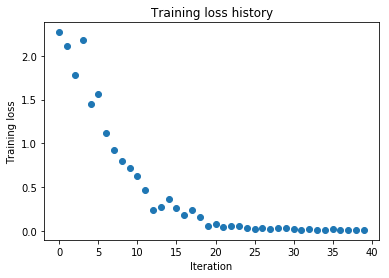

In [4]:
# TODO: Use a three-layer Net to overfit 50 training examples.

num_train = 50
small_data = {
  'X_train': data['X_train'][:num_train],
  'y_train': data['y_train'][:num_train],
  'X_val': data['X_val'],
  'y_val': data['y_val'],
}

learning_rate = 1e-2
weight_scale = 1e-2

model = FullyConnectedNet([200, 200],
              weight_scale=weight_scale, dtype=np.float64)
solver = Solver(model, small_data,
                print_every=10, num_epochs=20, batch_size=25,
                update_rule='sgd',
                optim_config={
                  'learning_rate': learning_rate,
                }
         )
solver.train()

plt.plot(solver.loss_history, 'o')
plt.title('Training loss history')
plt.xlabel('Iteration')
plt.ylabel('Training loss')
plt.show()

Now try to use a five-layer network with 100 units on each layer to overfit 50 training examples. 

**TODO:**
Again you will have to `adjust the learning rate and weight initialization`, but you should be able to achieve 100% training accuracy within 20 epochs.

(Epoch 0 / 20) (Iteration 1 / 40) loss: inf train acc: 0.120000 val_acc: 0.108000
(Epoch 5 / 20) (Iteration 11 / 40) loss: 4.854955 train acc: 0.840000 val_acc: 0.127000
(Epoch 10 / 20) (Iteration 21 / 40) loss: 2.581516 train acc: 0.960000 val_acc: 0.125000
(Epoch 15 / 20) (Iteration 31 / 40) loss: 0.000000 train acc: 1.000000 val_acc: 0.122000


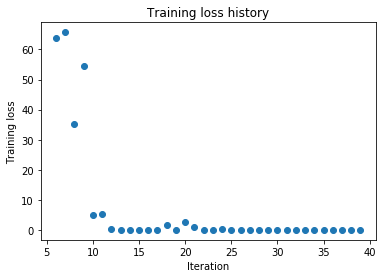

In [6]:
# TODO: Use a five-layer Net to overfit 50 training examples.

num_train = 50
small_data = {
  'X_train': data['X_train'][:num_train],
  'y_train': data['y_train'][:num_train],
  'X_val': data['X_val'],
  'y_val': data['y_val'],
}

learning_rate = 0.0001
weight_scale = 0.1
model = FullyConnectedNet([200, 200, 200, 200, 200],
                weight_scale=weight_scale, dtype=np.float64)
solver = Solver(model, small_data,
                print_every=10, num_epochs=20, batch_size=25,
                update_rule='sgd',
                optim_config={
                  'learning_rate': learning_rate,
                }
         )
solver.train()

plt.plot(solver.loss_history, 'o')
plt.title('Training loss history')
plt.xlabel('Iteration')
plt.ylabel('Training loss')
plt.show()

# Inline question: 
Did you notice anything about the comparative difficulty of training the three-layer net vs training the five layer net?

# Answer:
It was relatively harder to fine tune to overfit. In a three-layer, The first try I could overfit it. For the five layer, I had to run a double for loop, looping over different weight scale and learning rate to find it.


# SGD+Momentum
Stochastic gradient descent with momentum is a widely used update rule that tends to make deep networks converge faster than vanilla stochstic gradient descent.

Open the file `libs/optim.py` and read the documentation at the top of the file to make sure you understand the API. Implement the SGD+momentum update rule in the function `sgd_momentum` and run the following to check your implementation. You should see errors less than 1e-8.

In [7]:
from libs.optim import sgd_momentum

N, D = 4, 5
w = np.linspace(-0.4, 0.6, num=N*D).reshape(N, D)
dw = np.linspace(-0.6, 0.4, num=N*D).reshape(N, D)
v = np.linspace(0.6, 0.9, num=N*D).reshape(N, D)

config = {'learning_rate': 1e-3, 'velocity': v}
next_w, _ = sgd_momentum(w, dw, config=config)

expected_next_w = np.asarray([
  [ 0.1406,      0.20738947,  0.27417895,  0.34096842,  0.40775789],
  [ 0.47454737,  0.54133684,  0.60812632,  0.67491579,  0.74170526],
  [ 0.80849474,  0.87528421,  0.94207368,  1.00886316,  1.07565263],
  [ 1.14244211,  1.20923158,  1.27602105,  1.34281053,  1.4096    ]])
expected_velocity = np.asarray([
  [ 0.5406,      0.55475789,  0.56891579, 0.58307368,  0.59723158],
  [ 0.61138947,  0.62554737,  0.63970526,  0.65386316,  0.66802105],
  [ 0.68217895,  0.69633684,  0.71049474,  0.72465263,  0.73881053],
  [ 0.75296842,  0.76712632,  0.78128421,  0.79544211,  0.8096    ]])

print('next_w error: ', rel_error(next_w, expected_next_w))
print('velocity error: ', rel_error(expected_velocity, config['velocity']))

next_w error:  8.882347033505819e-09
velocity error:  4.269287743278663e-09


running with  sgd
(Epoch 0 / 5) (Iteration 1 / 200) loss: 2.768939 train acc: 0.080000 val_acc: 0.093000
(Epoch 0 / 5) (Iteration 11 / 200) loss: 2.232598 train acc: 0.080000 val_acc: 0.188000
(Epoch 0 / 5) (Iteration 21 / 200) loss: 2.220102 train acc: 0.080000 val_acc: 0.218000
(Epoch 0 / 5) (Iteration 31 / 200) loss: 2.023023 train acc: 0.080000 val_acc: 0.246000
(Epoch 1 / 5) (Iteration 41 / 200) loss: 2.030687 train acc: 0.270000 val_acc: 0.251000
(Epoch 1 / 5) (Iteration 51 / 200) loss: 2.062255 train acc: 0.270000 val_acc: 0.254000
(Epoch 1 / 5) (Iteration 61 / 200) loss: 2.057339 train acc: 0.270000 val_acc: 0.269000
(Epoch 1 / 5) (Iteration 71 / 200) loss: 1.949063 train acc: 0.270000 val_acc: 0.252000
(Epoch 2 / 5) (Iteration 81 / 200) loss: 1.906796 train acc: 0.296000 val_acc: 0.278000
(Epoch 2 / 5) (Iteration 91 / 200) loss: 1.913908 train acc: 0.296000 val_acc: 0.298000
(Epoch 2 / 5) (Iteration 101 / 200) loss: 1.768143 train acc: 0.296000 val_acc: 0.276000
(Epoch 2 / 5) 

/anaconda3/envs/aienv/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


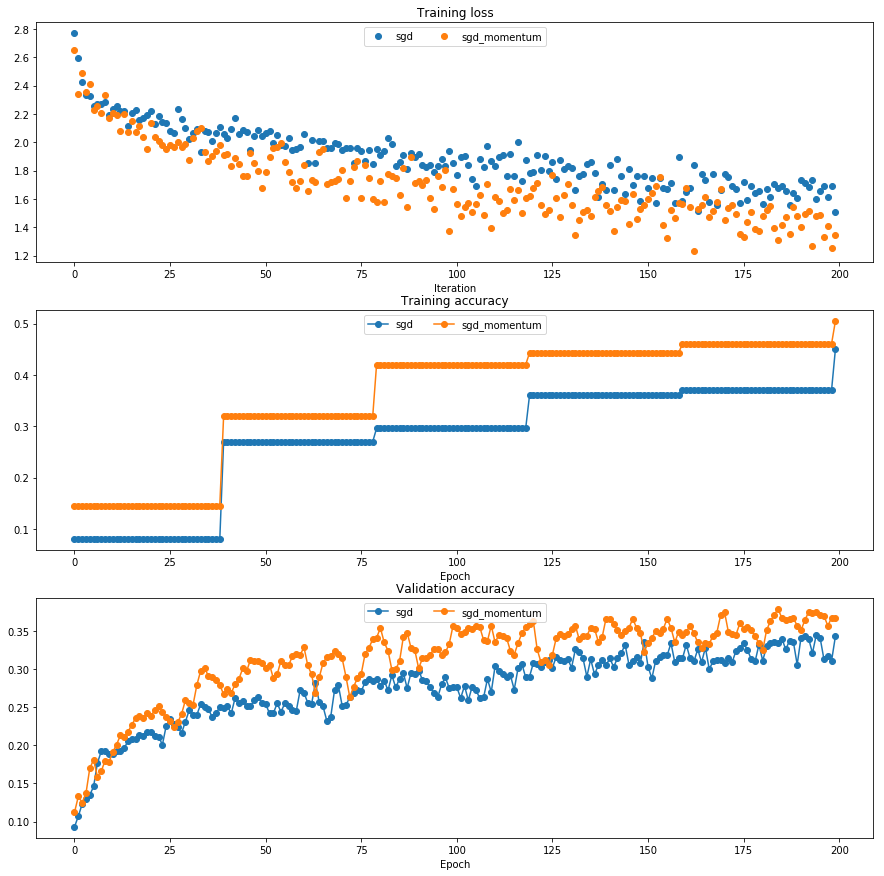

In [8]:
num_train = 4000
small_data = {
  'X_train': data['X_train'][:num_train],
  'y_train': data['y_train'][:num_train],
  'X_val': data['X_val'],
  'y_val': data['y_val'],
}

solvers = {}

for update_rule in ['sgd', 'sgd_momentum']:
    print('running with ', update_rule)
    model = FullyConnectedNet([100, 100, 100, 100, 100], weight_scale=5e-2)

    solver = Solver(model, small_data,
                  num_epochs=5, batch_size=100,
                  update_rule=update_rule,
                  optim_config={
                    'learning_rate': 1e-2,
                  },
                  verbose=True)
    solvers[update_rule] = solver
    solver.train()
    print

plt.subplot(3, 1, 1)
plt.title('Training loss')
plt.xlabel('Iteration')

plt.subplot(3, 1, 2)
plt.title('Training accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 3)
plt.title('Validation accuracy')
plt.xlabel('Epoch')

for update_rule, solver in solvers.items():
    plt.subplot(3, 1, 1)
    plt.plot(solver.loss_history, 'o', label=update_rule)

    plt.subplot(3, 1, 2)
    plt.plot(solver.train_acc_history, '-o', label=update_rule)

    plt.subplot(3, 1, 3)
    plt.plot(solver.val_acc_history, '-o', label=update_rule)
    
for i in [1, 2, 3]:
    plt.subplot(3, 1, i)
    plt.legend(loc='upper center', ncol=4)
plt.gcf().set_size_inches(15, 15)
plt.show()

# RMSProp and Adam
RMSProp [1] and Adam [2] are update rules that set per-parameter learning rates by using a running average of the second moments of gradients.

In the file `libs/optim.py`, implement the RMSProp update rule in the `rmsprop` function and implement the Adam update rule in the `adam` function, and check your implementations using the tests below.

[1] Tijmen Tieleman and Geoffrey Hinton. "Lecture 6.5-rmsprop: Divide the gradient by a running average of its recent magnitude." COURSERA: Neural Networks for Machine Learning 4 (2012).

[2] Diederik Kingma and Jimmy Ba, "Adam: A Method for Stochastic Optimization", ICLR 2015.

In [9]:
# Test RMSProp implementation; you should see errors less than 1e-7
from libs.optim import rmsprop

N, D = 4, 5
w = np.linspace(-0.4, 0.6, num=N*D).reshape(N, D)
dw = np.linspace(-0.6, 0.4, num=N*D).reshape(N, D)
cache = np.linspace(0.6, 0.9, num=N*D).reshape(N, D)

config = {'learning_rate': 1e-2, 'cache': cache}
next_w, _ = rmsprop(w, dw, config=config)

expected_next_w = np.asarray([
  [-0.39223849, -0.34037513, -0.28849239, -0.23659121, -0.18467247],
  [-0.132737,   -0.08078555, -0.02881884,  0.02316247,  0.07515774],
  [ 0.12716641,  0.17918792,  0.23122175,  0.28326742,  0.33532447],
  [ 0.38739248,  0.43947102,  0.49155973,  0.54365823,  0.59576619]])
expected_cache = np.asarray([
  [ 0.5976,      0.6126277,   0.6277108,   0.64284931,  0.65804321],
  [ 0.67329252,  0.68859723,  0.70395734,  0.71937285,  0.73484377],
  [ 0.75037008,  0.7659518,   0.78158892,  0.79728144,  0.81302936],
  [ 0.82883269,  0.84469141,  0.86060554,  0.87657507,  0.8926    ]])

print('next_w error: ', rel_error(expected_next_w, next_w))
print('cache error: ', rel_error(expected_cache, config['cache']))

next_w error:  1.0007967647444523e-07
cache error:  2.6477955807156126e-09


In [18]:
# Test Adam implementation; you should see errors around 1e-7 or less
from libs.optim import adam

N, D = 4, 5
w = np.linspace(-0.4, 0.6, num=N*D).reshape(N, D)
dw = np.linspace(-0.6, 0.4, num=N*D).reshape(N, D)
m = np.linspace(0.6, 0.9, num=N*D).reshape(N, D)
v = np.linspace(0.7, 0.5, num=N*D).reshape(N, D)

config = {'learning_rate': 1e-2, 'm': m, 'v': v, 't': 5}
next_w, _ = adam(w, dw, config=config)

expected_next_w = np.asarray([
  [-0.40094747, -0.34836187, -0.29577703, -0.24319299, -0.19060977],
  [-0.1380274,  -0.08544591, -0.03286534,  0.01971428,  0.0722929],
  [ 0.1248705,   0.17744702,  0.23002243,  0.28259667,  0.33516969],
  [ 0.38774145,  0.44031188,  0.49288093,  0.54544852,  0.59801459]])
expected_v = np.asarray([
  [ 0.69966,     0.68908382,  0.67851319,  0.66794809,  0.65738853,],
  [ 0.64683452,  0.63628604,  0.6257431,   0.61520571,  0.60467385,],
  [ 0.59414753,  0.58362676,  0.57311152,  0.56260183,  0.55209767,],
  [ 0.54159906,  0.53110598,  0.52061845,  0.51013645,  0.49966,   ]])
expected_m = np.asarray([
  [ 0.48,        0.49947368,  0.51894737,  0.53842105,  0.55789474],
  [ 0.57736842,  0.59684211,  0.61631579,  0.63578947,  0.65526316],
  [ 0.67473684,  0.69421053,  0.71368421,  0.73315789,  0.75263158],
  [ 0.77210526,  0.79157895,  0.81105263,  0.83052632,  0.85      ]])

print('next_w error: ', rel_error(expected_next_w, next_w))
print('v error: ', rel_error(expected_v, config['v']))
print('m error: ', rel_error(expected_m, config['m']))

next_w error:  1.139887467333134e-07
v error:  4.208314038113071e-09
m error:  4.214963193114416e-09


running with  adam
(Epoch 0 / 5) (Iteration 1 / 200) loss: 3.346106 train acc: 0.106000 val_acc: 0.078000
(Epoch 0 / 5) (Iteration 11 / 200) loss: 1.992866 train acc: 0.106000 val_acc: 0.226000
(Epoch 0 / 5) (Iteration 21 / 200) loss: 1.942513 train acc: 0.106000 val_acc: 0.290000
(Epoch 0 / 5) (Iteration 31 / 200) loss: 1.935746 train acc: 0.106000 val_acc: 0.309000
(Epoch 1 / 5) (Iteration 41 / 200) loss: 1.812209 train acc: 0.349000 val_acc: 0.302000
(Epoch 1 / 5) (Iteration 51 / 200) loss: 1.793806 train acc: 0.349000 val_acc: 0.344000
(Epoch 1 / 5) (Iteration 61 / 200) loss: 1.757146 train acc: 0.349000 val_acc: 0.322000
(Epoch 1 / 5) (Iteration 71 / 200) loss: 1.565659 train acc: 0.349000 val_acc: 0.354000
(Epoch 2 / 5) (Iteration 81 / 200) loss: 1.543933 train acc: 0.424000 val_acc: 0.349000
(Epoch 2 / 5) (Iteration 91 / 200) loss: 1.456761 train acc: 0.424000 val_acc: 0.334000
(Epoch 2 / 5) (Iteration 101 / 200) loss: 1.673966 train acc: 0.424000 val_acc: 0.347000
(Epoch 2 / 5)

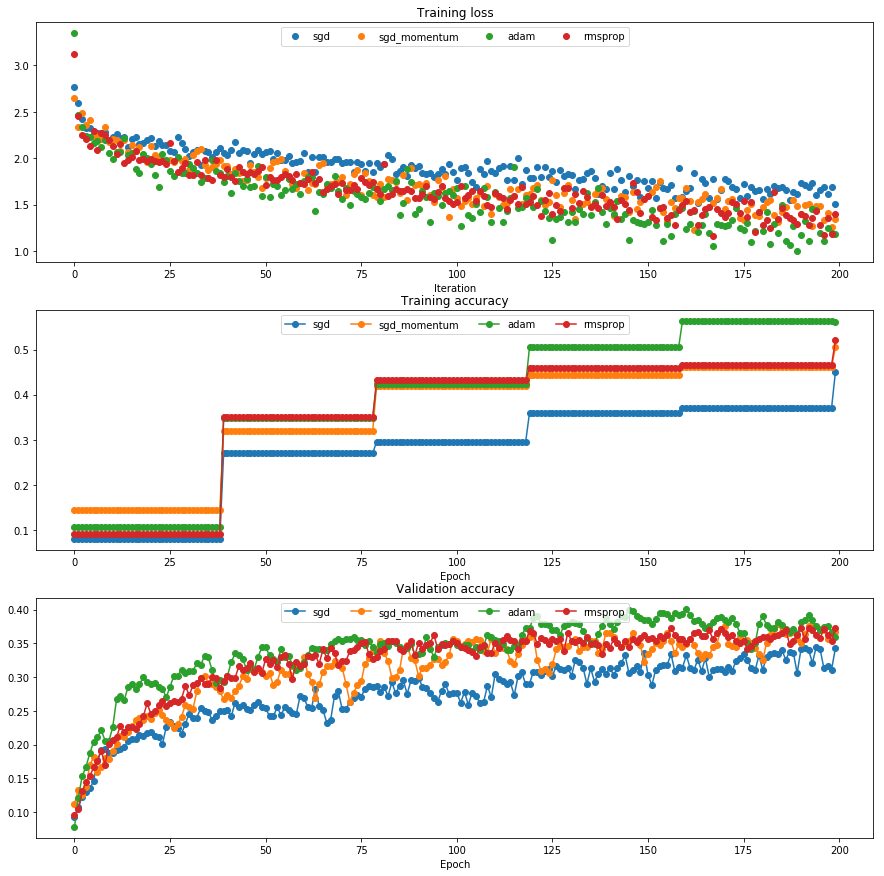

In [19]:
learning_rates = {'rmsprop': 1e-4, 'adam': 1e-3}
for update_rule in ['adam', 'rmsprop']:
    print('running with ', update_rule)
    model = FullyConnectedNet([100, 100, 100, 100, 100], weight_scale=5e-2)

    solver = Solver(model, small_data,
                  num_epochs=5, batch_size=100,
                  update_rule=update_rule,
                  optim_config={
                    'learning_rate': learning_rates[update_rule]
                  },
                  verbose=True)
    solvers[update_rule] = solver
    solver.train()
    print

plt.subplot(3, 1, 1)
plt.title('Training loss')
plt.xlabel('Iteration')

plt.subplot(3, 1, 2)
plt.title('Training accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 3)
plt.title('Validation accuracy')
plt.xlabel('Epoch')

for update_rule, solver in solvers.items():
    plt.subplot(3, 1, 1)
    plt.plot(solver.loss_history, 'o', label=update_rule)

    plt.subplot(3, 1, 2)
    plt.plot(solver.train_acc_history, '-o', label=update_rule)

    plt.subplot(3, 1, 3)
    plt.plot(solver.val_acc_history, '-o', label=update_rule)
    
for i in [1, 2, 3]:
    plt.subplot(3, 1, i)
    plt.legend(loc='upper center', ncol=4)
    
plt.gcf().set_size_inches(15, 15)
plt.show()